In [54]:
import matplotlib.pyplot as plt
import random
import numpy as np
from cmath import nan


In [45]:
class Node:
    def __init__(self, num, transmitStatus = False, numOfPackets = 1):
        self.num = num
        self.transmitStatus = transmitStatus
        self.numOfPackets = numOfPackets


In [60]:
def RandomStatus(n):
    if random.randint(1,2) == 1:
        return True
    return False

False
True
success 1
1
Success: 1 Collision 0 Empty 1
Efficiency 0.5
True
success 1
False
False
False
False
True
success 2
2
Success: 2 Collision 0 Empty 1
Efficiency 0.6666666666666666
False
True
success 2
False
True
success 1
False
False
False
False
False
False
False
False
False
False
True
success 3
3
Success: 3 Collision 0 Empty 2
Efficiency 0.6


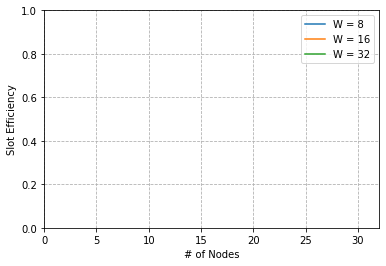

In [67]:
n1 = []
n2 = []
n3 = []
array_list = [n1,n2,n3]
Empty = []
Collision = []
Success = []
efficiency = []
numOfNodes = 3

for i in range(1, numOfNodes+1):
    countSuccess=0
    countCollision=0
    countEmpty=0
    listOfNodes = []
    for j in range(i):
        listOfNodes.append( Node(j+1))
    NumOfSlots = 10
    for k in range(NumOfSlots):
        NumTrue = 0
        for node in listOfNodes:
            if(node.numOfPackets!=0):
                node.transmitStatus = RandomStatus(i)
            # print(node.num, node.transmitStatus, node.numOfPackets)
            print(node.transmitStatus)
            if(node.transmitStatus):
                print("success", node.num)
                array_list[node.num - 1].append(node.num)
            else:

                array_list[node.num - 1].append(nan)
            if(node.transmitStatus==True):
                NumTrue+=1
        if(NumTrue==0):
            # print("Empty")
            Empty.append(0.5)
            Collision.append(nan)
            Success.append(nan)
            countEmpty+=1
        elif(NumTrue==1):
            for node in listOfNodes:
                if(node.transmitStatus==True):
                    node.numOfPackets-=1
                    node.transmitStatus=False
            # print("Success")
            Empty.append(nan)
            Collision.append(nan)
            Success.append(0.5)
            countSuccess+=1
        else:
            # print("Collision")
            Empty.append(nan)
            Collision.append(0.5)
            Success.append(nan)
            countCollision+=1
        if(countSuccess == len(listOfNodes)):
            # print(len(listOfNodes))
            NumOfSlots=countSuccess+countEmpty+countCollision
            # print(i)
            break
    print(i)
    plt.plot(i,countSuccess/NumOfSlots)
    print("Success:",countSuccess, "Collision",countCollision, "Empty", countEmpty)
    print("Efficiency", countSuccess/NumOfSlots)
    efficiency.append(countSuccess/NumOfSlots)

efficiency
# print(countSuccess)
# print(countSuccess)
# print(NumOfSlots)

    #if statement if one or more is true
    #then collision occured
    #if only one true, no collision, Success
plt.xlabel("# of Nodes")
plt.ylabel("Slot Efficiency")
plt.legend(['W = 8', 'W = 16', 'W = 32'], loc='upper right')
plt.axis([0, 32, 0, 1])
plt.grid(linestyle='--')
plt.show()

In [64]:
for node in array_list:
    print(node)
print("Empty",Empty)
print("Collision",Collision)
print("Success",Success)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, 1, 1, nan, nan, nan, 1, nan, 1, 1, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, 1, nan, 1, 1, nan, nan, 1, nan, nan, nan, 1]
[nan, 1, 1, nan, nan, nan]
Empty [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, nan, 1, nan, nan, nan, nan, 1, 1, nan, nan, nan, nan, nan, nan, 1, 1, nan]
Collision [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, nan, nan, nan]
Success [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, 1, nan, 1, 1, nan, nan, 1, 1, 1, 1, nan, 1, nan, nan, 1]


In [164]:
sum = 0
for s in efficiency:
    sum+=s

print(sum/len(efficiency))

0.2131754792948666


In [2]:
date_array=['2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29', '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05', '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23', '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04', '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18', '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01', '2018-06-04', '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-11', '2018-06-12', '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29', '2018-07-02', '2018-07-03', '2018-07-05', '2018-07-06', '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13', '2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03', '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-13', '2018-08-14', '2018-08-15']

value_1 = [45.27, 44.53, 44.68, 45.29, 44.43, 44.88, 45.85, 45.7, 44.76, 44.22, 44.81, 44.54, 44.13, 44.0, 43.41, 43.68, 43.29, 42.33, 42.18, 41.8, 41.78, 42.46, 43.67, 43.92, 44.75, 44.33, 44.41, 45.7, 43.8, 44.16, 44.9, 45.07, 46.24, 48.3, 49.21, 49.84, 50.34, 50.4, 49.98, 50.7, 49.15, 48.5, 48.53, 47.65, 48.52, 47.36, 46.13, 46.01, 47.27, 48.04, 49.48, 49.96, 50.48, 51.3, 52.29, 51.86, 50.2, 49.42, 50.0, 52.42, 52.32, 52.62, 52.13, 51.13, 50.24, 48.66, 48.99, 48.05, 48.33, 49.22, 50.62, 51.39, 51.87, 47.37, 49.53, 49.54, 51.82, 51.65, 52.98, 52.09, 54.24, 53.98, 52.72, 51.09, 49.99, 48.55, 47.98, 48.67, 48.87, 48.45, 48.65, 50.06, 52.64, 54.6, 56.61, 55.77, 55.59, 56.5, 56.31, 54.0]

value_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 95.39398869716304, 95.39398869716304, 0, 0, 95.39398869716304, 95.39398869716304, 0, 0, 0, 0, 0, 0, 0, 95.39398869716304]

ValueError: x and y must have same first dimension, but have shapes (0,) and (100,)

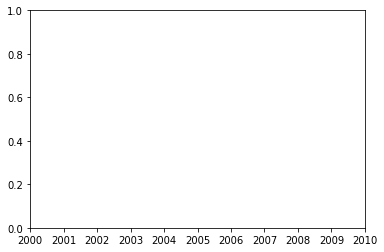

In [6]:
from datetime import datetime

date_array = []
value_2 = [np.nan if x==0 else x for x in value_2]
x = date_array
y1 = value_1
y2 = value_2
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot_date(x, y1, c='b', label='fig 1')
ax1.plot_date(x, y2, c='r', label='fig 2')
plt.legend(loc='upper left')
plt.xticks(rotation=70)
plt.show()

[1 2 3 4 5 6 7 8 9]


C:\Users\amrme\AppData\Local\Temp/ipykernel_9204/162568724.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(n1, "ob", color='violet', label="Node1")
C:\Users\amrme\AppData\Local\Temp/ipykernel_9204/162568724.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(n2, "ob", color='blue', label="Node2")
C:\Users\amrme\AppData\Local\Temp/ipykernel_9204/162568724.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(n3, "ob", color='yellow', label="Node3")
C:\Users\amrme\AppData\Local\Temp/ipykernel_9204/162568724.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'

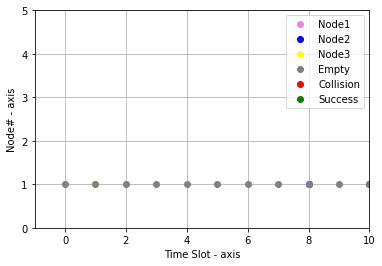

In [65]:

# x axis values

x = np.arange(1,10)
# x = np.arange(1,numOfNodes)
print(x)
# corresponding y axis values

# n1 = [Node1Amp,Node1Amp,Node1Amp, nan,Node1Amp, nan, Node1Amp, nan,Node1Amp, nan]
# n2 = [Node2Amp,Node2Amp, nan, Node2Amp,Node2Amp, nan, Node2Amp, Node2Amp,nan , nan]
# Empty = [nan, nan, nan, nan ,nan, StatusAmp, nan , nan, nan,StatusAmp]
# Collision = [StatusAmp, StatusAmp, nan, nan ,StatusAmp,  nan,StatusAmp , nan, nan,nan]
# Success = [nan, nan, StatusAmp, StatusAmp ,nan, nan, nan , StatusAmp, StatusAmp,nan]

# plotting the points 
plt.plot(n1, "ob", color='violet', label="Node1")
plt.plot(n2, "ob", color='blue', label="Node2")
plt.plot(n3, "ob", color='yellow', label="Node3")
plt.plot(Empty, "ob", color='grey', label="Empty")
plt.plot(Collision, "ob", color='red', label="Collision")
plt.plot(Success, "ob", color='green', label="Success")
# plt.plot(y1,"ob")
# naming the x axis
plt.xlabel('Time Slot - axis')
# naming the y axis
plt.ylabel('Node# - axis')
plt.axis([-1, 10, 0, 5])
# giving a title to my graph
# plt.title('My first graph!')
plt.grid() 
# function to show the plot
plt.legend()
plt.show()


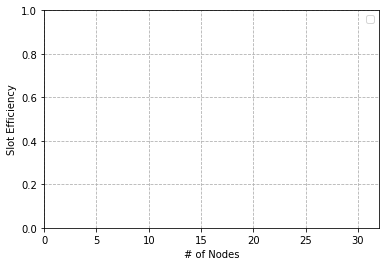

In [166]:
plt.xlabel("# of Nodes")
plt.ylabel("Slot Efficiency")
plt.legend(['W = 8', 'W = 16', 'W = 32'], loc='upper right')
plt.axis([0, 32, 0, 1])
plt.grid(linestyle='--')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

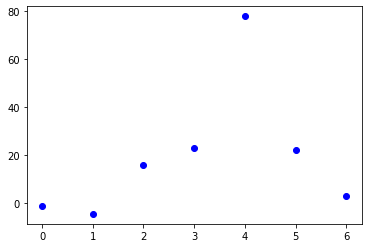

In [19]:
plt.plot([-1, -4.5, 16, 23, 78, 22, 3], "ob")
plt.show